# SOCIAL MEDIA ANALYSIS
-----------------
# Initialization

This analysis will focus on the social media reactions to the corona virus and the economic consequences of the virus in US. The goal with the analysis is to get insight in how the people of US relates to the virus and the consequences of the virus such as the lockdown and rapidly decreasing economic situation in the US. Futhermore will the analysis look into the global and national (US) awareness of the corona virus the social media. 

In [376]:
# Initial Imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Matplotlib style options
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 4)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Loading COVID19 data

In [377]:
# Loading COVID19 data into pandas dataframe
df_corona = pd.read_csv('./Data/covid_19_clean_complete.csv')

# Converting the date format from object to datatime
df_corona['Date'] = pd.to_datetime(df_corona['Date'])

Tranforming COVID19 data frame to be per date and only containing deaths and confirmed. Since the use of COVID19 data in this analysis is very specific. 

In [378]:
# Only keeping data from same period as twitter data
df_corona = df_corona[df_corona['Date'] > '2020-03-03']
# Only keeping data from US
df_corona = df_corona[df_corona['Country/Region'] == 'US']
# Grouping by date
df_corona = df_corona[['Date','Deaths','Confirmed']].groupby(['Date']).sum()

Loading twitter data

In [379]:
# String with dates to load twitter data from
dates = ['2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
        '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23','2020-03-24','2020-03-25','2020-03-26',
        '2020-03-27','2020-03-28','2020-03-29','2020-03-30','2020-03-31','2020-04-01','2020-04-02','2020-04-03',
        '2020-04-04','2020-04-05','2020-04-06','2020-04-07','2020-04-08','2020-04-09','2020-04-10','2020-04-11',
        '2020-04-12','2020-04-13','2020-04-14','2020-04-15','2020-04-16','2020-04-17','2020-04-18','2020-04-19',
        '2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-25','2020-04-26','2020-04-27',
        '2020-04-28','2020-04-29','2020-04-30']

In [382]:
###Warning: Takes 5 minutes to run code below###


# Loading initial twitter data file 
All_tweets = pd.read_csv('./Data/tweets/2020-03-00 Coronavirus Tweets (pre 2020-03-12).CSV')
# Deleting rows without country code to shrink data set into only relevant data. 
All_tweets.dropna(subset = ["country_code"], inplace=True)

# Making loop to load the many ofther twitter data files
for i in dates:
    # New data file load 
    df_tweet = pd.read_csv('./Data/tweets/'+str(i)+' Coronavirus Tweets.CSV')
    # Deleting rows without country code to shrink data set into only relevant data. 
    df_tweet.dropna(subset = ["country_code"], inplace=True)
    # Merging newest load to the main dataframe. 
    All_tweets = pd.concat([All_tweets,df_tweet])

In [383]:
# Cleaning up dataframe - removing columns without importance. 
All_tweets = All_tweets.drop(['screen_name', 'source','reply_to_status_id','reply_to_user_id','reply_to_user_id',
                 'is_quote','is_retweet','friends_count','account_lang','account_created_at',
                 'ISO 3166 Country Code','Country','favourites_count','reply_to_screen_name'], axis=1)

KeyError: "['ISO 3166 Country Code' 'Country'] not found in axis"

Size of twitter dataframe is printed below

In [384]:
All_tweets.shape

(1308276, 22)

Reformatting the datatime format and adding data column to the dataframe

In [385]:
# Reformatting the datetime column

# Importing time package
import time
# Defining empty datatime list
Datetime = []
# Looping over all date values in weather dataframe and appending correct matching datetime format to datetime list.
for i in All_tweets["created_at"].values:
    strp  = time.strptime(i[:19], "%Y-%m-%dT%H:%M:%S")
    strf = time.strftime("%Y-%m-%d %H:%M:%S", strp)
    Datetime.append(strf)
# Renaming datetime column to match column name for rounded datatime data in crime dataframe
All_tweets['Datetime'] = pd.to_datetime(Datetime)
# Removing original datatime column from dataset
All_tweets = All_tweets.drop(['created_at'], axis=1)

# Adding date
All_tweets['Date'] = pd.DatetimeIndex(All_tweets['Datetime']).date
All_tweets['Date'] = pd.to_datetime(All_tweets['Date'])

Printing a distribution plot of the daily amount of tweets about COVID19 since start march. IT can be seen that the tweet amount peaked around mid-late march and then stabelized at a lower level in april. 

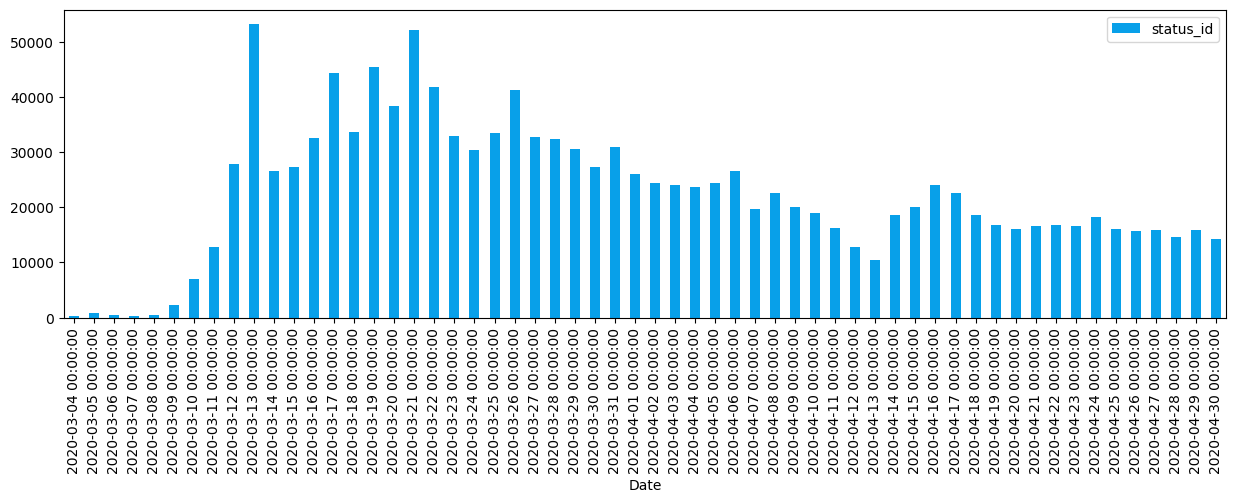

In [386]:
All_tweets[['Date','status_id']].groupby('Date').count().plot(kind='bar',color='#08a0e9')
plt.show()

--------
# Social trend analysis
In the following part of the notebook will the text in the tweets be analysized in order to show eventual trends of topics. First is a text processing function made to clean the tweeted texts. For This part will the focus be on tweets made in US. 

In [387]:
# Imports
from sklearn.feature_extraction import stop_words
import string

# Defining stop words 
my_stop_words = stop_words.ENGLISH_STOP_WORDS

# Text processing function
def text_processing(text):
    # Remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # Set all to lowercase
    text = "".join([c.lower() for c in text])
    # Remove stop words
    text = " ".join([w for w in text.split() 
                     if w not in my_stop_words])
    return text

In [388]:
# Only focusing on tweets from US
text_tweets = All_tweets[All_tweets['country_code'] == 'US']
# Only focusing on english language tweets
text_tweets = text_tweets[text_tweets['lang'] == 'en']
# Dropping eventual NaN values. 
text_tweets.dropna()

# Making a column in the dataframe for all tweets with the cleaned text - the text processing function is applied
text_tweets['clean text'] =text_tweets['text'].apply(text_processing)

Five trends of interest is analyzied by analysing the occurrence of some key words connected to the given trend.

In [389]:
# Adding one hot encoded columns to dateframe based on whether or not certain words was a part of a given tweet. 
text_tweets['Just a flu'] = text_tweets['clean text'].str.contains('|'.join(['hoax','lies',
                                                                            'fake','flu','cold'])).astype(int)

text_tweets['Apocalypse'] = text_tweets['clean text'].str.contains('|'.join(['crisis','run',
                                                                            'coronapocalypse',
                                                                            'coronapocolypse'])).astype(int)

text_tweets['Stayhome'] = text_tweets['clean text'].str.contains('|'.join(['socialdistancing','stayhome', 
                                                                           'quarantine','stayathome','quarantinelife',
                                                                           'lockdown','distancing','flattenthecurve',
                                                                           'stayhomesavelives','washyourhands',
                                                                           'sanitizer'])).astype(int)

text_tweets['Economics'] = text_tweets['clean text'].str.contains('|'.join(['workers', 'work', 
                                                                                 'business', 'job', 'money',
                                                                                 'economy','businesses','employees',
                                                                                 'office','restaurants',
                                                                                 'unemployment','company','companies',
                                                                                 'colleagues','paid',
                                                                                 'customers'])).astype(int)

text_tweets['Reopen!'] = text_tweets['clean text'].str.contains('|'.join(['open','reopen'])).astype(int)

# Grouping categories of interest by the date. 
gb1 = text_tweets[['Date','Just a flu','Economics','Apocalypse','Stayhome','Reopen!']].groupby('Date').sum()

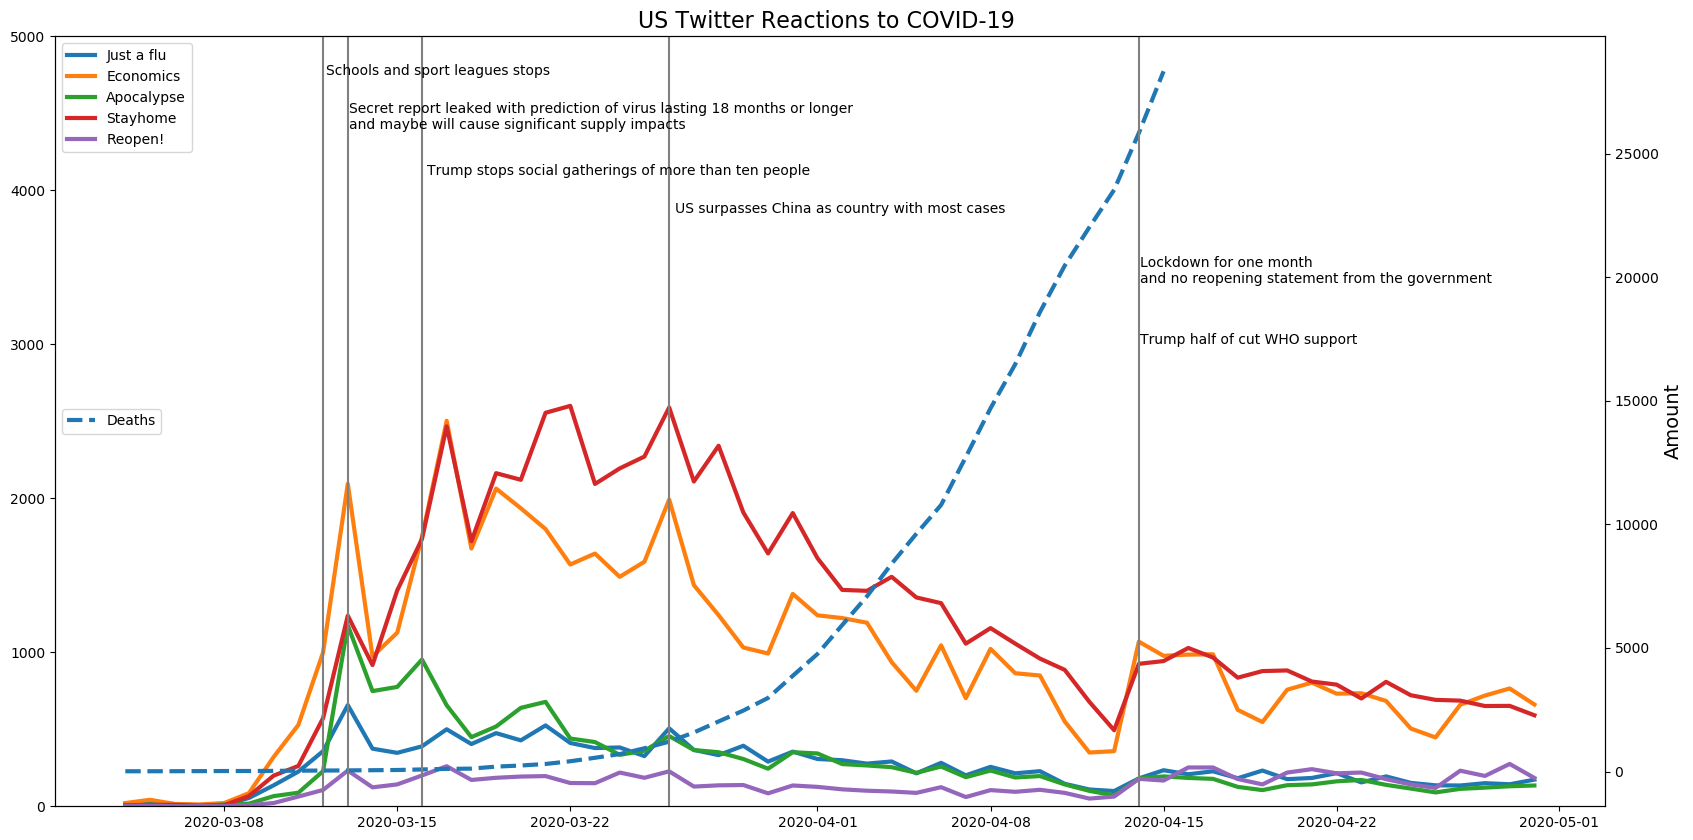

In [390]:
# Plotting US Twitter Reactions to COVID-19 

# Defining secondary axis
fig, ax1 = plt.subplots(figsize=[20,10])
ax2 = ax1.twinx()

# Title and axis labels
plt.title("US Twitter Reactions to COVID-19 ",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)
ax1.set_ylim(0,5000)

# Plotting lines
ax1.plot(gb1.index,gb1['Just a flu'], linewidth=3)
ax1.plot(gb1.index,gb1['Economics'], linewidth=3)
ax1.plot(gb1.index,gb1['Apocalypse'], linewidth=3)
ax1.plot(gb1.index,gb1['Stayhome'], linewidth=3)
ax1.plot(gb1.index,gb1['Reopen!'], linewidth=3)
ax2.plot(df_corona.index,df_corona['Deaths'],'--', linewidth=3)

# Vertical lines and comments
plt.axvline(x='2020-03-12',c='grey')
plt.annotate('Schools and sport leagues stops',xy=(0.175, 0.95), xycoords='axes fraction')
plt.axvline(x='2020-03-13',c='grey')
plt.annotate('Secret report leaked with prediction of virus lasting 18 months or longer ',xy=(0.19, 0.90), xycoords='axes fraction')
plt.annotate('and maybe will cause significant supply impacts ',xy=(0.19, 0.88), xycoords='axes fraction')
plt.axvline(x='2020-03-16',c='grey')
plt.annotate('Trump stops social gatherings of more than ten people',xy=(0.24, 0.82), xycoords='axes fraction')
plt.axvline(x='2020-03-26',c='grey')
plt.annotate('US surpasses China as country with most cases',xy=(0.40, 0.77), xycoords='axes fraction')
plt.axvline(x='2020-04-14',c='grey')
plt.annotate('Lockdown for one month',xy=(0.7, 0.70), xycoords='axes fraction')
plt.annotate('and no reopening statement from the government',xy=(0.7, 0.68), xycoords='axes fraction')
plt.annotate('Trump half of cut WHO support ',xy=(0.7, 0.60), xycoords='axes fraction')
plt.xticks(rotation=45)

# Adding legends
ax1.legend(('Just a flu', 'Economics', 'Apocalypse','Stayhome','Reopen!'),loc=2)
ax2.legend(['Deaths'],loc=6)
plt.show()

Many interesting trends can be seen in the above chart. First of all does it seem like the closing of schools and sport leagues as well a leak of a pretty pessimistic secret report kick starts the american puplic COVID19 attention on twitter. 

It can be seen that both the "just a flu"-tweets and the "Apocalypse"-tweets is peaking around this date. However since the peak has both the amount of "just a flu"-tweets and the "Apocalypse"-tweets been steadly decreasing. It certainly looks like people found out that this not is our doom as humans but neither just a basic flu. 

In general is the amount of tweets concerned about economics and preventing spread almost the same. In other words does the economics consequense of the virus get just as much attention as how to avoid the virus spread. When looking only at the "Economics"-tweets trend can it be seen that a big increase in social media attention happened the same day as US had been in lockdown for almost a month and the gonvernment made a statement with no reopening insight. This is also the date where the 'Reopen!'-tweets starts to increase. 

Now is a deep dive into the tweets concerned with economics made

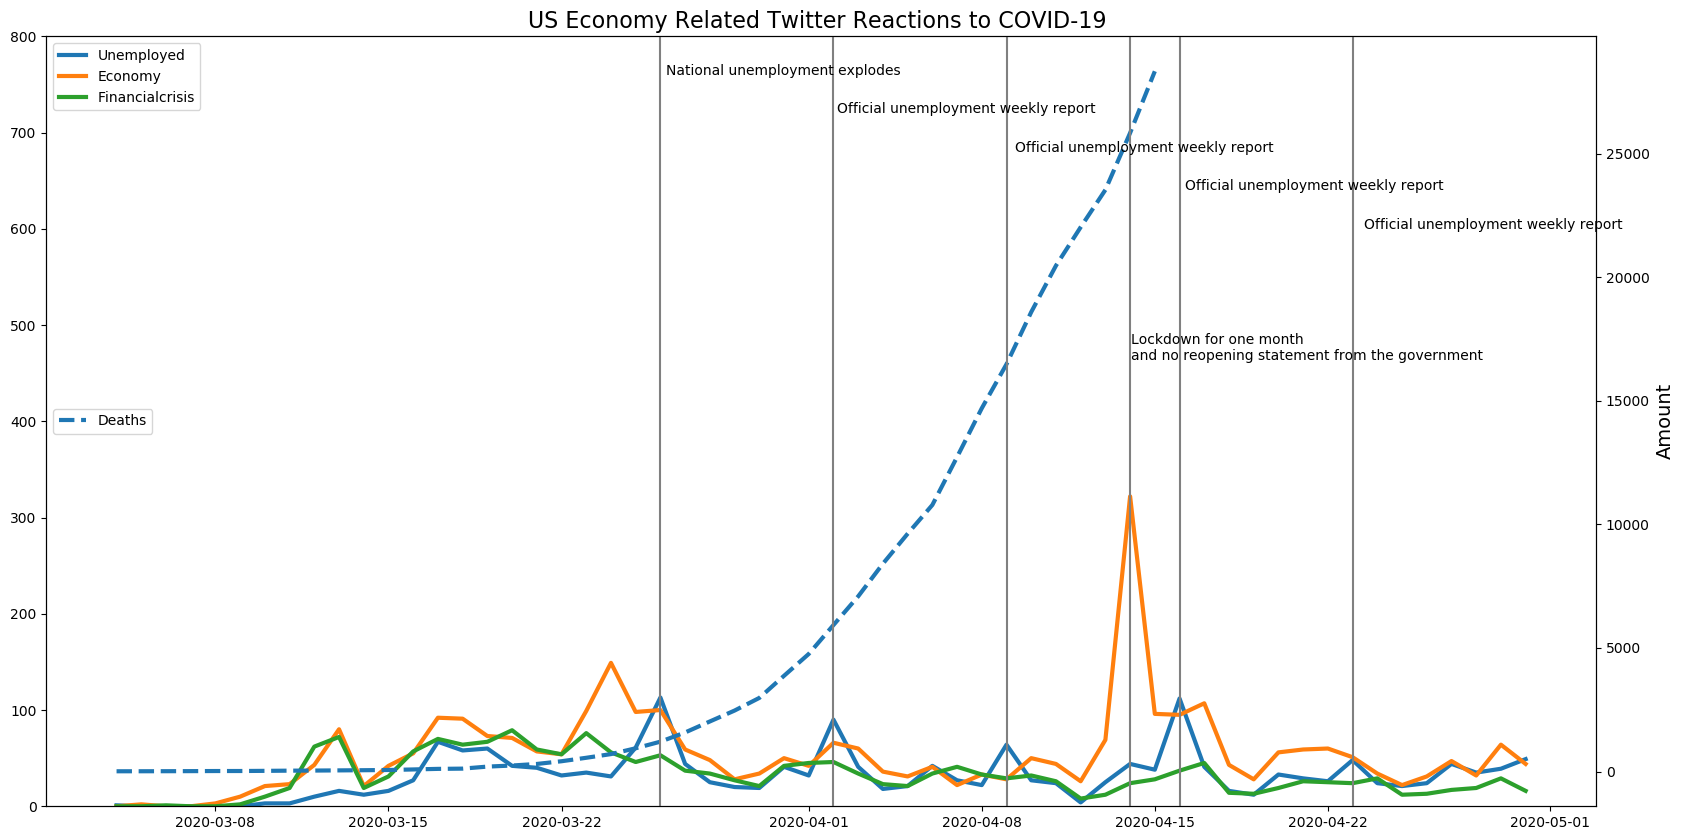

In [391]:
# ECONOMY DEEPDIVE
text_tweets['Unemployed'] = text_tweets['clean text'].str.contains('|'.join(['unemployment','unemployed'])).astype(int)
text_tweets['Economy'] = text_tweets['clean text'].str.contains('|'.join(['economy','economics'])).astype(int)
text_tweets['Financialcrisis'] = text_tweets['clean text'].str.contains('|'.join(['financialcrisis','financial','2007','2008','bankcollaps','banks'])).astype(int)

# Grouping categories of interest by the date. 
gb2 = text_tweets[['Date','Unemployed','Economy','Financialcrisis']].groupby('Date').sum()

# Plot of COVID-19 Twitter Development
# Defining secondary axis
fig, ax1 = plt.subplots(figsize=[20,10])
ax2 = ax1.twinx()

plt.title("US Economy Related Twitter Reactions to COVID-19 ",fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Amount',fontsize=14)
ax1.set_ylim(0,800)

# Plotting lines
ax1.plot(gb2.index,gb2['Unemployed'], linewidth=3)
ax1.plot(gb2.index,gb2['Economy'], linewidth=3)
ax1.plot(gb2.index,gb2['Financialcrisis'], linewidth=3)
ax2.plot(df_corona.index,df_corona['Deaths'],'--', linewidth=3)

# Vertical lines and comments
plt.axvline(x='2020-04-23',c='grey')
plt.annotate('National unemployment explodes',xy=(0.40 , 0.95), xycoords='axes fraction')
plt.axvline(x='2020-04-16',c='grey')
plt.annotate('Official unemployment weekly report',xy=(0.51 , 0.90), xycoords='axes fraction')
plt.axvline(x='2020-04-09',c='grey')
plt.annotate('Official unemployment weekly report',xy=(0.625 , 0.85), xycoords='axes fraction')
plt.axvline(x='2020-04-02',c='grey')
plt.annotate('Official unemployment weekly report',xy=(0.735 , 0.80), xycoords='axes fraction')
plt.axvline(x='2020-03-26',c='grey')
plt.annotate('Official unemployment weekly report',xy=(0.85 , 0.75), xycoords='axes fraction')
plt.axvline(x='2020-04-14',c='grey')
plt.annotate('Lockdown for one month',xy=(0.7, 0.60), xycoords='axes fraction')
plt.annotate('and no reopening statement from the government',xy=(0.7, 0.58), xycoords='axes fraction')

#plt.annotate('Lockdown for one month',xy=(0.7, 0.70), xycoords='axes fraction')
#plt.annotate('and no reopening statement from the government',xy=(0.7, 0.68), xycoords='axes fraction')
#plt.annotate('Trump half of cut WHO support ',xy=(0.7, 0.60), xycoords='axes fraction')
plt.xticks(rotation=45)

# Adding legends
ax1.legend(('Unemployed', 'Economy', 'Financialcrisis'),loc=2)
ax2.legend(['Deaths'],loc=6)
plt.show()

The chart shows us a weekly trend in the 'Unemployed'-tweets. Futher investigation showed that these tweets peak the same day as the weekly official unemployment number report surfaces. This trend has been happening since 2 weeks after the lockdown started. Futhermore is a huge jump in tweets about economy happening the day where the government states that no reopening is insight. This clearly shows the people's high concerns with the economic situation that the lockdown causes which also often has been compared to the financial crisis in 2008. 

--------
# General COVID19 awareness

Only keeping tweets with city location to get more precise location heatmap.

In [146]:
All_tweets['number'] = All_tweets['Date'].dt.strftime("%Y%m%d").astype(int)
All_tweets_localmap = All_tweets[All_tweets['place_type']=='city']

Converting city names to latitude and longitude coordinates

In [150]:
# Dateframe to convert country code in twitter data to latitude and longitude coordinates.
df_City_lat_long = pd.read_csv('./Data/World_Cities_Location_table.csv',sep=';',header=None)

In [151]:
# Defining column names
df_City_lat_long['City'] = df_City_lat_long.iloc[:,2]
df_City_lat_long['Latitude'] = df_City_lat_long.iloc[:,3]
df_City_lat_long['Longitude'] = df_City_lat_long.iloc[:,4]

# Cleaning up the dateframe
del df_City_lat_long[0]
del df_City_lat_long[1]
del df_City_lat_long[2]
del df_City_lat_long[3]
del df_City_lat_long[4]
del df_City_lat_long[5]

# Making All_tweets_localmap dataframe ready to be merched with coordinates.
All_tweets_localmap['City'] = All_tweets_localmap.loc[:,'place_full_name'].str.split(',').str[0]
del All_tweets_localmap['place_type']
del All_tweets_localmap['place_full_name']
del All_tweets_localmap['Latitude']
del All_tweets_localmap['Longitude']

# Merging latitude and longitude city coordinates on to twitter data
All_tweets_localmap = All_tweets_localmap.merge(df_City_lat_long, on='City')

Making interactive heatmap of a COVID19 attention on twitter

**picture of heatmap**

In [ ]:
## Import of folium packages
#import folium
#from folium import plugins
#from folium.plugins import HeatMap

## Heatmap of COVID.19 Tweets in countries
#hMap3 = folium.Map([0, 0], zoom_start=2)

## Filter the DF
#Local_Heat_tweets = All_tweets_localmap[['Latitude', 'Longitude']]
## List comprehension to make out list of lists
#Local_Heat_tweets = [[row['Latitude'],row['Longitude']] for index, row in Local_Heat_tweets.iterrows()]
## Plot it on the map
#HeatMap(Local_Heat_tweets,radius=12, max_zoom=20).add_to(hMap3)

#hMap3

Making interactive heatmap over time of a COVID19 attention on twitter

**video of heatmap**

In [ ]:
## inporting chain tool for concat of ranges
#from itertools import chain
## Heatmap running from start march to end march of COVID.19 Tweets in countries
#hMap4 = folium.Map([0, 0], zoom_start=2)

##Create weight column, using day number
#Local_Heat_tweets2 = All_tweets_localmap[['Latitude', 'Longitude','number']]

## List comprehension to make out list of lists
#Local_Heat_tweets2 = [[[row['Latitude'],row['Longitude']] for index, row in Local_Heat_tweets2[Local_Heat_tweets2['number'] == i].iterrows()] for i in chain(range(20200303,20200331),range(20200401, 20200431))]

## Plot it on the map
#hm = plugins.HeatMapWithTime(Local_Heat_tweets2,auto_play=True,max_opacity=0.7, min_speed = 5.0,radius=6)
#hm.add_to(hMap4)
##Display the map
#hMap4